<a href="https://colab.research.google.com/github/pradosh2008/learn-datascience-playground/blob/main/pdf_pmf_cdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create sample data
data = {
    'Age': [25, 30, 35, 40, 45, 50],
    'Salary': [50000, 60000, 70000, 80000, 90000, 100000],
    'Experience': [2, 4, 6, 8, 10, 12]
}

df = pd.DataFrame(data)
print("Original Data:")
print(df)
print("\nDescriptive Statistics:")
print(df.describe())

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data (computes mean and std)
scaler.fit(df)

# Show the computed means and standard deviations
print("\nComputed Means:", scaler.mean_)
print("Computed Standard Deviations:", scaler.scale_)

# Transform the data
scaled_data = scaler.transform(df)

# Convert to DataFrame for better visualization
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
print("\nScaled Data:")
print(scaled_df)
print("\nScaled Data Statistics:")
print(scaled_df.describe())

# Alternatively, use fit_transform to do both steps at once
scaled_data_combined = scaler.fit_transform(df)

Original Data:
   Age  Salary  Experience
0   25   50000           2
1   30   60000           4
2   35   70000           6
3   40   80000           8
4   45   90000          10
5   50  100000          12

Descriptive Statistics:
             Age         Salary  Experience
count   6.000000       6.000000    6.000000
mean   37.500000   75000.000000    7.000000
std     9.354143   18708.286934    3.741657
min    25.000000   50000.000000    2.000000
25%    31.250000   62500.000000    4.500000
50%    37.500000   75000.000000    7.000000
75%    43.750000   87500.000000    9.500000
max    50.000000  100000.000000   12.000000

Computed Means: [3.75e+01 7.50e+04 7.00e+00]
Computed Standard Deviations: [8.53912564e+00 1.70782513e+04 3.41565026e+00]

Scaled Data:
       Age   Salary  Experience
0 -1.46385 -1.46385    -1.46385
1 -0.87831 -0.87831    -0.87831
2 -0.29277 -0.29277    -0.29277
3  0.29277  0.29277     0.29277
4  0.87831  0.87831     0.87831
5  1.46385  1.46385     1.46385

Scaled Data S

# StandardScaler with Train-Test Split for Linear Regression

This notebook demonstrates proper usage of `StandardScaler` with train-test split for linear regression.

In [4]:
## 1. Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

2. Create Sample Data
We'll create a simple housing dataset with features: Size, Bedrooms, Age and target variable Price.

In [2]:
data = {
    'Size': [1200, 1500, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200],
    'Bedrooms': [2, 3, 3, 4, 4, 4, 5, 5, 5, 6],
    'Age': [10, 5, 8, 3, 1, 2, 4, 7, 9, 6],
    'Price': [250000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000]
}

df = pd.DataFrame(data)
X = df[['Size', 'Bedrooms', 'Age']]  # Features
y = df['Price']  # Target

3. Train-Test Split
Split data into 80% training and 20% test sets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)

Training Data Shape: (8, 3)
Test Data Shape: (2, 3)


4. Standard Scaling
Key Principle: Fit only on training data, then transform both sets.

In [6]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data (using training parameters)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrames for visualization
train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

5. Verify Scaling Results
Check statistics before and after scaling.

In [7]:
print("Original Training Data Statistics:")
print(X_train.describe())

print("\nScaled Training Data Statistics:")
print(train_scaled_df.describe())

print("\nScaled Test Data Statistics:")
print(test_scaled_df.describe())

Original Training Data Statistics:
              Size  Bedrooms        Age
count     8.000000  8.000000   8.000000
mean   2275.000000  4.125000   5.125000
std     622.781778  1.246423   3.136764
min    1200.000000  2.000000   1.000000
25%    1950.000000  3.750000   2.750000
50%    2300.000000  4.000000   5.000000
75%    2650.000000  5.000000   7.250000
max    3200.000000  6.000000  10.000000

Scaled Training Data Statistics:
           Size      Bedrooms           Age
count  8.000000  8.000000e+00  8.000000e+00
mean   0.000000  5.551115e-17  5.551115e-17
std    1.069045  1.069045e+00  1.069045e+00
min   -1.845307 -1.822591e+00 -1.405847e+00
25%   -0.557883 -3.216338e-01 -8.094272e-01
50%    0.042914 -1.072113e-01 -4.260143e-02
75%    0.643712  7.504788e-01  7.242243e-01
max    1.587822  1.608169e+00  1.661456e+00

Scaled Test Data Statistics:
           Size  Bedrooms       Age
count  2.000000  2.000000  2.000000
mean  -0.042914 -0.107211  0.639021
std    1.820691  1.212957  0.963960
m

6. Train Linear Regression Model

In [8]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

7. Evaluate Model Performance

In [9]:
# Make predictions
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

# Show coefficients
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

Training RMSE: 0.00
Test RMSE: 17677.67

Feature Coefficients:
Size: 145639.75
Bedrooms: 0.00
Age: -0.00


8. Visualization
Compare original vs scaled features.

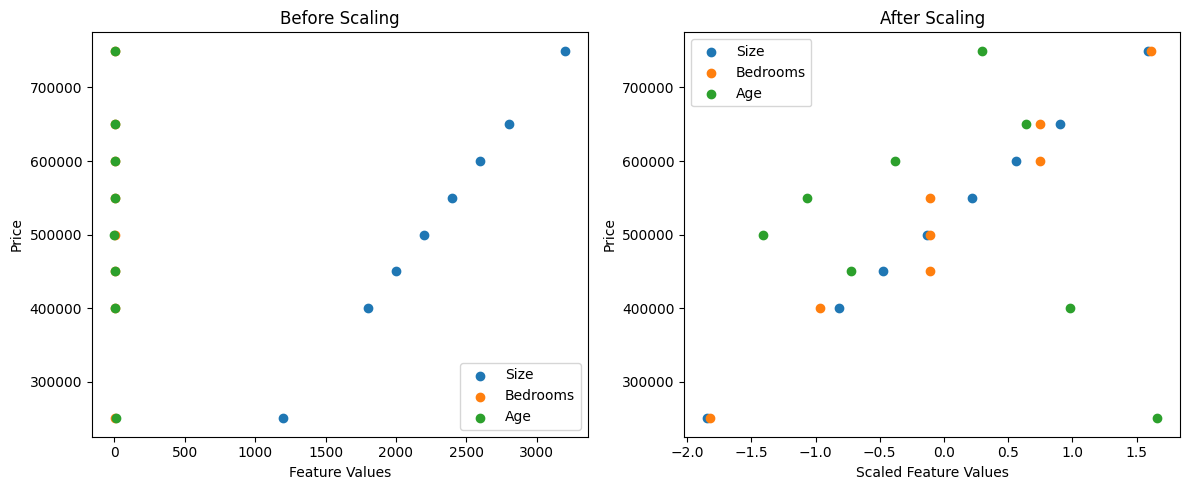

In [10]:
plt.figure(figsize=(12, 5))

# Original features
plt.subplot(1, 2, 1)
for column in X_train.columns:
    plt.scatter(X_train[column], y_train, label=column)
plt.title('Before Scaling')
plt.xlabel('Feature Values')
plt.ylabel('Price')
plt.legend()

# Scaled features
plt.subplot(1, 2, 2)
for i, column in enumerate(X_train.columns):
    plt.scatter(X_train_scaled[:, i], y_train, label=column)
plt.title('After Scaling')
plt.xlabel('Scaled Feature Values')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

9. Important Notes
Never fit scaler on test data - this causes data leakage

- The same scaling parameters must be used for both train and test sets

- For production pipelines, save the scaler object to reuse on new data

Scaling is especially important for:

- Distance-based algorithms (KNN, SVM)

- Regularized models (Ridge/Lasso)

- Neural networks

- PCA and other dimensionality reduction techniques

10. Saving the Scaler (Bonus)
For production use, you can save the scaler:

In [11]:
import joblib

# Save scaler
joblib.dump(scaler, 'standard_scaler.pkl')

# Later load it
# loaded_scaler = joblib.load('standard_scaler.pkl')

['standard_scaler.pkl']